In [1]:
import sys
# nice style article  - which explicitly says I shouldn't do this
#      https://github.com/amontalenti/elements-of-python-style
# (so, at some point, but not now - sorry, I'll fix this)
sys.path.insert(0,"/Library/Python/2.7/site-packages")
#print sys.path

import time
import datetime

import math

import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
#print np.__version__
#print np.__file__

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
from matplotlib import rcParams
#print mpl.__version__
#print mpl.__file__

import json
from operator import itemgetter
%matplotlib inline

print (sys.version)

2.7.5 (default, Mar  9 2014, 22:15:05) 
[GCC 4.2.1 Compatible Apple LLVM 5.0 (clang-500.0.68)]


In [13]:
#
#
#  useful links
#
#    a) downloading stock data
#       https://www.quantshare.com/sa-426-6-ways-to-download-free-intraday-and-tick-data-for-the-us-stock-market
#
#    b) an api for yahoo finance
#       https://github.com/lukaszbanasiak/yahoo-finance
#


import urllib2

#response = urllib2.urlopen('http://python.org/')
# test with:
# curl -XGET "https://www.google.com/finance/getprices?i=60&p=2d&f=d,c&df=cpct&q=AAPL"
response = urllib2.urlopen('https://www.google.com/finance/getprices?i=60&p=2d&f=d,c&df=cpct&q=AAPL')
print "Response:", response

# Get the URL. This gets the real URL. 
print "The URL is: ", response.geturl()

# Getting the code
print "This gets the code: ", response.code

# Get the Headers. 
# This returns a dictionary-like object that describes the page fetched, 
# particularly the headers sent by the server
#print "The Headers are: ", response.info()

# Get the date part of the header
#print "The Date is: ", response.info()['date']

# Get the server part of the header
#print "The Server is: ", response.info()['server']

# Get all data
html = response.read()
#print "Get all data: ", html

# Get only the length
print "Get the length :", len(html)
print type(html)
print html.count("\n")
print html[3:40]

# Showing that the file object is iterable
#for line in response:
i = 0
#for line in html:
    #if i < 10:
    #    print line
    #print line.rstrip()
    
for line in html.splitlines():
    if i < 10:
        print line
    i += 1

# Note that the rstrip strips the trailing newlines and carriage returns before
# printing the output.

Response: <addinfourl at 4344843944 whose fp = <socket._fileobject object at 0x108687a50>>
The URL is:  https://www.google.com/finance/getprices?i=60&p=2d&f=d,c&df=cpct&q=AAPL
This gets the code:  200
Get the length : 8986
<type 'str'>
789
HANGE%3DNASDAQ
MARKET_OPEN_MINUTE=570
EXCHANGE%3DNASDAQ
MARKET_OPEN_MINUTE=570
MARKET_CLOSE_MINUTE=960
INTERVAL=60
COLUMNS=DATE,CLOSE
DATA=
TIMEZONE_OFFSET=-300
a1485527400,122.105
1,121.9703
2,122.2101


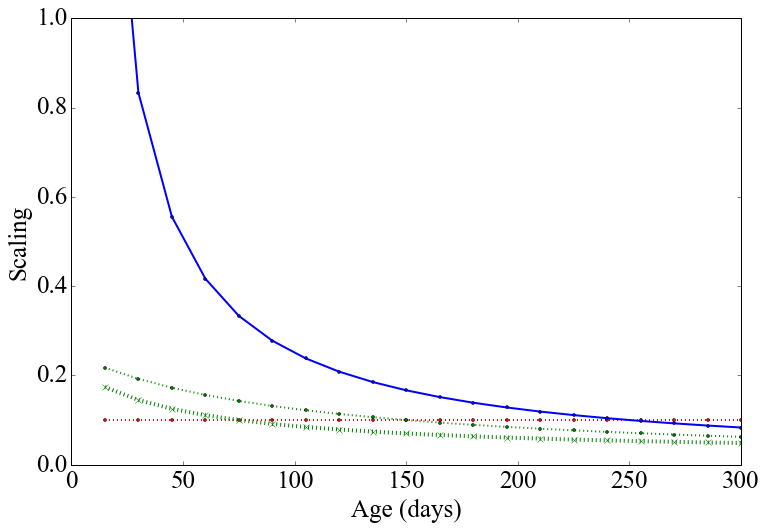

In [7]:
# generic shit
fig = plt.figure( figsize = (12.,8.))
font = {'family':'Times New Roman', 'size':25} # 'weight' : 'bold',
mpl.rc('font', **font)
ax= fig.add_subplot(1,1,1)




# --------------
#
#  test some scalings
#

age_d = range(15, 1500, 15)
#print age_d


#
# linear
#
def do_line(x, m, b):
    y = [m * ix + b for ix in x]
    return y

thisy = do_line(age_d, 0.0, 0.1)
ax.plot(age_d, thisy, ':r', marker='o', markersize=3, lw=2.0)


# other scaling
scaledy = [25.0 / ix for ix in age_d]
ax.plot(age_d, scaledy, '-b', marker='o', markersize=3, lw=2.0)

# other scaling
scaledy = [25.0 / (ix+100) for ix in age_d]
ax.plot(age_d, scaledy, ':g', marker='o', markersize=3, lw=2.0)

# other scaling
scaledy = [0.02 + 10.0 / (ix+50) for ix in age_d]
ax.plot(age_d, scaledy, ':g', marker='x', markersize=6, lw=4.0)



#ax.set_xlim([0,1500])
ax.set_xlim([0,300])
ax.set_ylim([0.,1.0])
ax.set_xlabel("Age (days)")
ax.set_ylabel("Scaling")


# --------------

plt.show()


In [ ]:
#
# idea 1
#

X = [34.56, 34.68, .....]
N = X.length

# Initial guess
# (lose 10 billion- bummer, but
# is supposed to guarantee getting
# set the first time. Could do with "None" too.

profit_max = -1.0e10

#
# buy loop
#
for ix in range(N-1):
    
    #
    # sell loop
    #
    for iix in range(ix+1,N):

        profit_i = X[iix] - X[ix]

        if profit_i > profit_max:
            profit_max = profit_i
            buy_i = ix
            sell_i = iix



# 
# Bad: O(N^2)
#



In [ ]:
#
# guess #2 - more efficient?  maybe?
#


profit_max = -1.0e10
prior_low_idx = 0

for ix in range(N-1):
    
    if X[ix] < X[prior_low_idx]:
        prior_low_idx = ix
    
    profit_i = X[ix+1] - X[prior_low_idx]
    
    if profit_i > profit_max:

        profit_max = profit_i
        buy_i = prior_low_idx
        sell_i = ix+1
        
        